# 2025년 3D 애니메이션 시장 성공 사례 비교 분석: 넷플릭스 '케이팝 데몬 헌터스'와 극장 개봉작 '킹 오브 킹스' 리뷰 데이터를 중심으로

본 분석은 2025년 이례적으로 침체된 3D 애니메이션 시장 속에서 예상치 못한 흥행 성공을 거둔 두 작품, '케이팝 데몬 헌터스'와 '킹 오브 킹스'를 전략적으로 선별하여 그들의 리뷰 데이터를 통해 성공 전략을 비교 분석하고, 이를 통해 글로벌 애니메이션 시장에 유의미한 시사점을 도출하는 데 목적이 있습니다.

'케이팝 데몬 헌터스'가 넷플릭스라는 새로운 유통 플랫폼을 활용하고 K-POP, 무속신앙 등 한국적 요소를 융합하여 새로운 시장을 창출하는 모델을 제시했다면, '킹 오브 킹스'는 순수 한국 자본과 기술력으로 서구 문화의 핵심인 기독교 소재를 다루고 북미 극장 시장에서 직접 흥행을 이뤄내며 전통적인 성공 모델의 유효성을 입증합니다.

이 프로젝트는 로튼토마토(Rotten Tomatoes)에서 2025년 8월 넷째 주에 크롤링한 데이터를 기반으로 합니다. 특히, 비평가 리뷰는 'Top Critics'를 중심으로, 사용자 리뷰는 'ALL AUDIENCE'에서 'LOAD MORE' 버튼을 15번 반복하여 수집된 데이터를 사용하여 분석의 신뢰성을 높였습니다. Pandas 기반의 데이터 분석을 통해 각 영화의 핵심 정보(유통 방식, 흥행 성과, 소재 등)를 구조화하고, 궁극적으로 미디어 유통의 경계가 무너지는 시대에 콘텐츠가 어떤 전략을 통해 관객에게 도달하고 성공하는지에 대한 중요한 시사점을 제공합니다.

| 구분 | 케이팝 데몬 헌터스 (KPop Demon Hunters) | 킹 오브 킹스 (The King of Kings) |
|---|---|---|
| **장르** | Action/Adventure/Comedy/Fantasy/Animation | Kids & Family/Drama/Animation |
| **개봉일** | 넷플릭스 2025년 6월 20일 공개 | 2025년 4월 11일 (북미) |
| **감독** | 매기 강, 크리스 아펠한스 | 장성호 |
| **북미 배급사** | 넷플릭스 | 엔젤 스튜디오 |
|**제작비**| 최소 6000만 달러(약 815억 원)에서 최대 1억 달러 이상(약 1387억 원) 규모로 추정 |360억 원|
|**성적**|넷플릭스 영화 1위, 북미 박스오피스 1위, 빌보드 핫 100 차트 1위|북미 박스오피스 60,270,106 달러, 월드 박스오피스 75,699,790 달러 |
| **줄거리** | K팝 아이돌 그룹 '헌트릭스'가 음악과 춤으로 악령을 퇴치하고 세상을 구하는 이야기 | 영국 대문호 찰스 디킨스가 아들에게 예수의 일생을 들려주는 이야기 |
| **특징** | 넷플릭스 영화 역대 최다 시청 기록. OST가 빌보드 차트 1위 기록 | 한국 제작 애니메이션. 북미에서 높은 흥행 기록 |

In [1]:
import pandas as pd
import glob
import re
from datetime import datetime
import os

# 모든 CSV 파일 경로 가져오기
all_files = glob.glob(os.path.join('../movie_data', '*.csv'))

df_list = []
for file in all_files:
    # 1. 파일명에서 영화 제목 추출
    file_name = os.path.basename(file)
    movie_title = file_name.replace('_all_reviews.csv', '').replace('_', ' ').title()

    # 2. CSV 파일을 읽고 데이터프레임으로 변환
    df = pd.read_csv(file, encoding='utf-8')
    
    # 3. 'movie_title' 열을 데이터프레임에 추가
    df['movie_title'] = movie_title
    df_list.append(df)

# 모든 데이터프레임을 하나로 합치기
df_all_reviews = pd.concat(df_list, ignore_index=True)

# 'review_date' 열을 날짜/시간 형식으로 변환
df_all_reviews['review_date'] = df_all_reviews['review_date'].apply(
    lambda x: datetime.strptime(re.sub(r'(\w{3})\s', r'\1.', x), '%b.%d, %Y') if re.match(r'\w{3}\s', x) else datetime.strptime(x, '%B %d, %Y')
)

display(df_all_reviews.info())
display(df_all_reviews.head())
display(df_all_reviews.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   author_type  663 non-null    object        
 1   critic_name  297 non-null    object        
 2   review_date  663 non-null    datetime64[ns]
 3   review_text  663 non-null    object        
 4   score        663 non-null    object        
 5   movie_title  663 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 31.2+ KB


None

,author_type,critic_name,review_date,review_text,score,movie_title
0,Top Critic,Alonso Duralde,2025-08-26,"Probably the year’s funniest animated feature,...",Fresh,Kpop Demon Hunters
1,Top Critic,Bill Goodykoontz,2025-08-25,Not everything will make perfect sense. I’m no...,Fresh,Kpop Demon Hunters
2,Top Critic,Radheyan Simonpillai,2025-08-23,Trends collide together in this glittery cornu...,Fresh,Kpop Demon Hunters
3,Top Critic,Mark Kermode,2025-08-18,It's weirdly good fun.,Fresh,Kpop Demon Hunters
4,Top Critic,Frank Scheck,2025-08-05,KPop Demon Hunters delivers not only a cornuco...,Fresh,Kpop Demon Hunters


,author_type,critic_name,review_date,review_text,score,movie_title
658,Audience,DG,2025-04-23,The animation was very good.,5/5.0,The King Of Kings
659,Audience,Virginia,2025-04-23,Quality of the movie,5/5.0,The King Of Kings
660,Audience,Winsome C,2025-04-23,This is a great movie for kids. My eleven-year...,5/5.0,The King Of Kings
661,Audience,NaN,2025-04-23,My wife and I took our 8 and 10 year old daugh...,5/5.0,The King Of Kings
662,Audience,Deborah,2025-04-23,Simple to understand movie telling the story o...,5/5.0,The King Of Kings


In [2]:
# matplotlib 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 프로젝트 내 폰트 경로
font_path = "../font/NanumGothic.ttf"
fm.fontManager.addfont(font_path)

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 기본 폰트로 설정
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False


영화별/리뷰 타입별 리뷰 수:
author_type         Audience  Top Critic
movie_title                             
Kpop Demon Hunters       320          12
The King Of Kings        320          11
--------------------------------------------------


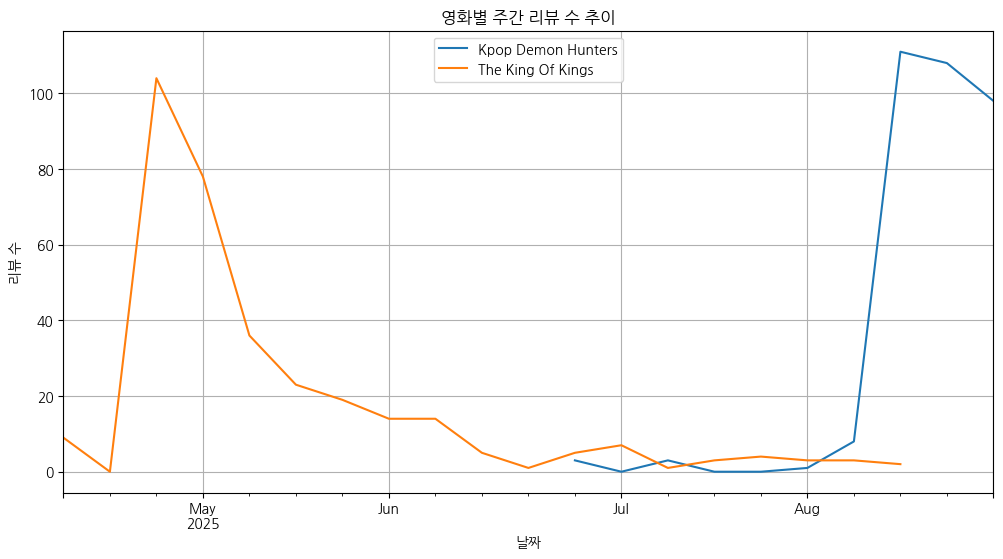

In [3]:
# 영화별/리뷰 타입별 리뷰 수 비교
review_counts = df_all_reviews.groupby(['movie_title', 'author_type']).size().unstack(fill_value=0)
print("영화별/리뷰 타입별 리뷰 수:")
print(review_counts)
print("-" * 50)

# 날짜별 리뷰 수 추이 시각화
plt.figure(figsize=(12, 6))

for movie in df_all_reviews['movie_title'].unique():
    df_movie = df_all_reviews[df_all_reviews['movie_title'] == movie].set_index('review_date')
    df_movie.resample('W').size().plot(label=f'{movie}')

plt.title('영화별 주간 리뷰 수 추이')
plt.xlabel('날짜')
plt.ylabel('리뷰 수')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from wordcloud import WordCloud, STOPWORDS as WC_STOPWORDS

# 커스텀 불용어 리스트
CUSTOM_STOPWORDS = set([
    "movie", "film", "watch", "see", "just", "like", "would", "even", "thing",
    "he", "she", "they", "his", "her", "its", "my", "you", "can", "have", "has",
    "was", "are", "not", "so", "one", "very", "about", "this", "that"
])

# WordCloud 기본 불용어와 유니온
STOPWORDS = WC_STOPWORDS.union(CUSTOM_STOPWORDS)

'Kpop Demon Hunters' 리뷰의 가장 많이 사용된 단어 (TOP 20개)
  - song: 110회
  - great: 104회
  - animation: 94회
  - love: 91회
  - good: 86회
  - story: 82회
  - music: 80회
  - time: 69회
  - demon: 65회
  - kpop: 62회
  - make: 57회
  - character: 57회
  - hunter: 46회
  - pop: 44회
  - fun: 43회
  - amaze: 37회
  - think: 36회
  - kid: 36회
  - sing: 34회
  - catchy: 32회
--------------------------------------------------


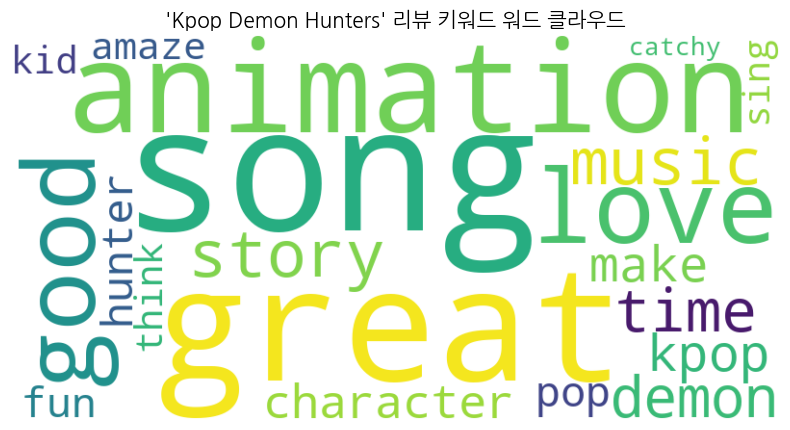

In [5]:
from collections import Counter
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    # WordNet 품사 태그에 맞게 변환
    return {
        'J': nltk.corpus.wordnet.ADJ,  # 형용사
        'V': nltk.corpus.wordnet.VERB, # 동사
        'N': nltk.corpus.wordnet.NOUN, # 명사
        'R': nltk.corpus.wordnet.ADV  # 부사
    }.get(tag[0], nltk.corpus.wordnet.NOUN)

def preprocess_text(text):
    # 소문자 변환, 특수문자 제거
    text = re.sub(r'[^a-z\s]', ' ', text.lower())
    words = text.split()
    
    # 품사 태깅 (Part-of-Speech Tagging)
    tagged = nltk.pos_tag(words)

    # 품사 필터링: 명사(N), 형용사(J), 동사(V)만 남김
    filtered = [(word, tag) for word, tag in tagged if tag[0] in ['N', 'J', 'V']]

    # 표제어 추출 (Lemmatization): 단어를 원형으로 변환
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in filtered]
    
    # 불용어 제거 및 2글자 이하 단어 제거
    return [word for word in lemmatized if word not in STOPWORDS and len(word) > 2]

def generate_wordcloud_and_list(texts, title, top_n=20):
    words = []
    for text in texts:
        words.extend(preprocess_text(text))
    word_counts = Counter(words)

    print(f"'{title}' 리뷰의 가장 많이 사용된 단어 (TOP {top_n}개)")
    for word, count in word_counts.most_common(top_n):
        print(f"  - {word}: {count}회")
    print("-" * 50)

    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        max_words=top_n,
        stopwords=STOPWORDS,
        collocations=False
    ).generate(" ".join(words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"'{title}' 리뷰 키워드 워드 클라우드", fontsize=15)
    plt.show()

# Kpop Demon Hunters 리뷰 데이터 필터링
kdh_reviews = df_all_reviews[df_all_reviews['movie_title'] == 'Kpop Demon Hunters']['review_text'].dropna().tolist()
generate_wordcloud_and_list(kdh_reviews, 'Kpop Demon Hunters')



'The King Of Kings' 리뷰의 가장 많이 사용된 단어 (TOP 20개)
  - story: 141회
  - jesus: 137회
  - great: 102회
  - kid: 95회
  - love: 84회
  - king: 67회
  - child: 60회
  - family: 56회
  - christ: 49회
  - way: 47회
  - tell: 45회
  - good: 44회
  - life: 44회
  - animation: 36회
  - enjoy: 34회
  - beautiful: 33회
  - make: 31회
  - take: 30회
  - old: 29회
  - recommend: 27회
--------------------------------------------------


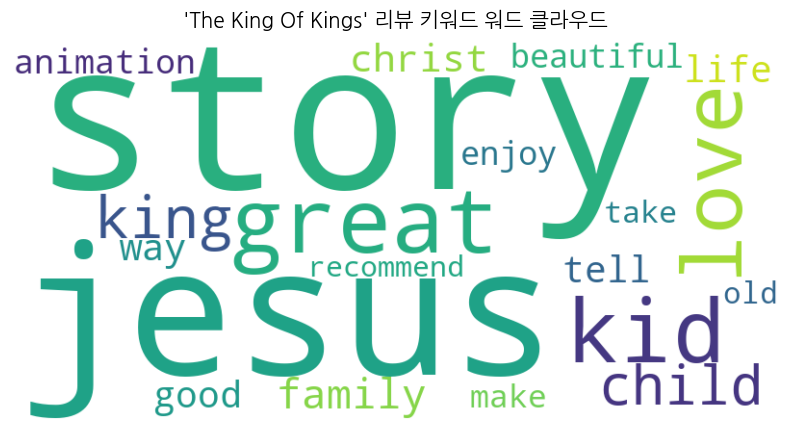

In [6]:
# The King Of Kings 리뷰 데이터 필터링
kok_reviews = df_all_reviews[df_all_reviews['movie_title'] == 'The King Of Kings']['review_text'].dropna().tolist()
generate_wordcloud_and_list(kok_reviews, 'The King Of Kings')




LDA 모델 토픽 분석 결과
Topic 0: 0.017*"animation" + 0.015*"song" + 0.014*"good" + 0.012*"demon" + 0.012*"kpop" + 0.011*"music" + 0.011*"hunter" + 0.009*"great" + 0.009*"pop" + 0.009*"time"
Topic 1: 0.033*"story" + 0.032*"jesus" + 0.027*"kid" + 0.027*"great" + 0.021*"love" + 0.017*"family" + 0.016*"child" + 0.013*"king" + 0.011*"christ" + 0.011*"tell"
Topic 2: 0.014*"great" + 0.014*"story" + 0.013*"love" + 0.012*"good" + 0.011*"time" + 0.010*"animation" + 0.010*"song" + 0.010*"character" + 0.008*"music" + 0.006*"make"


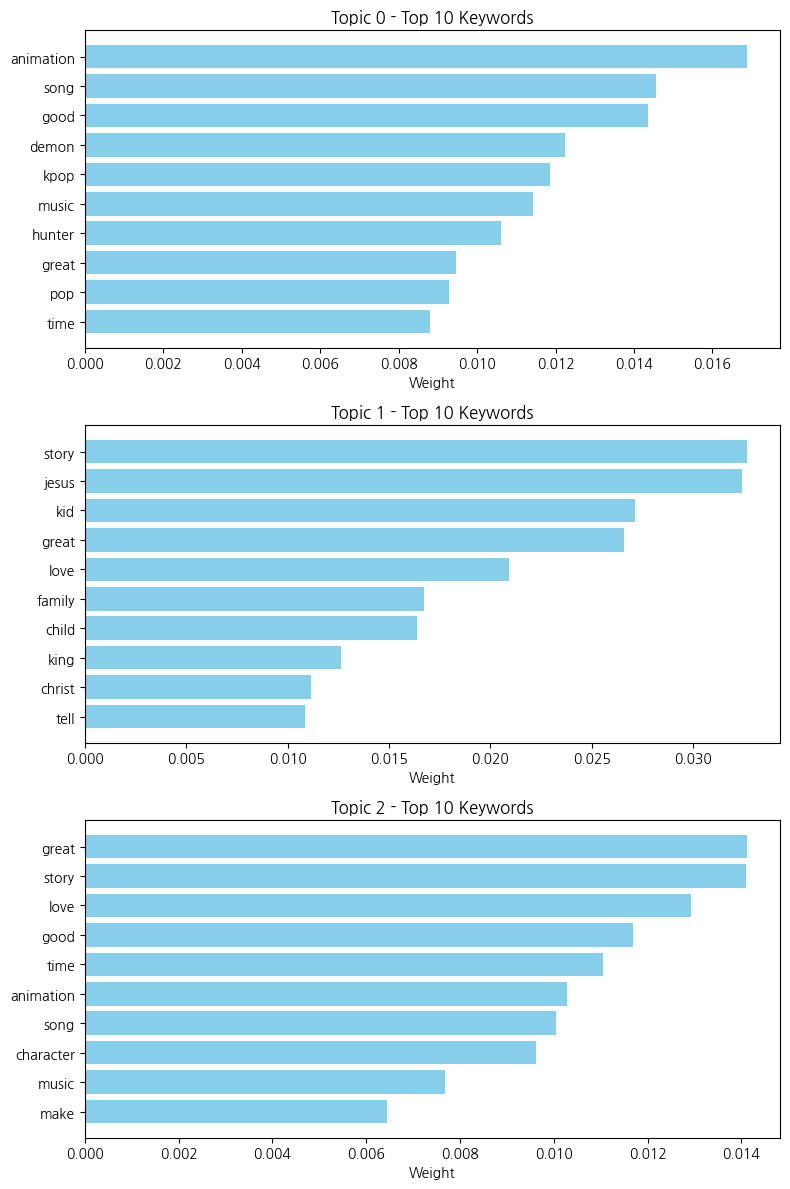

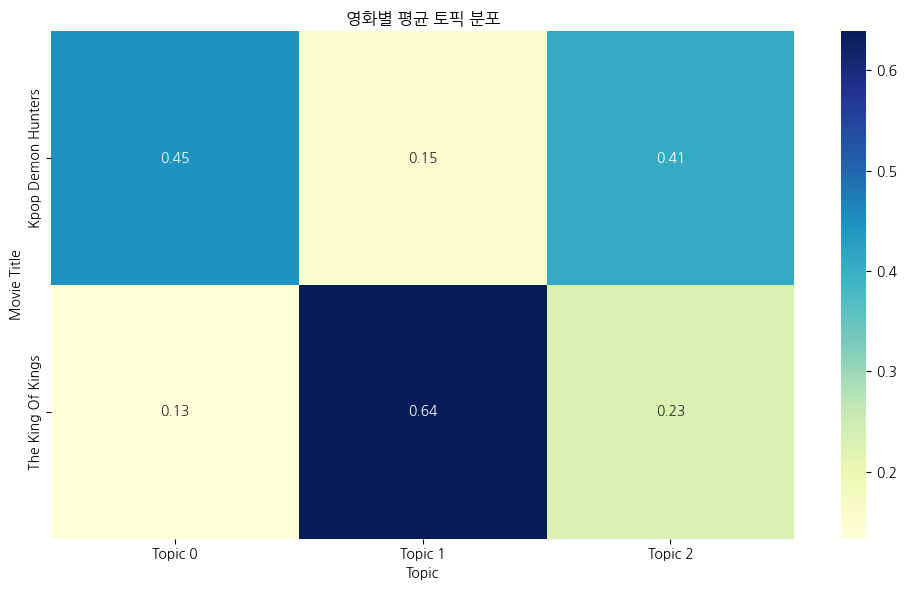

In [7]:
import seaborn as sns
from gensim import corpora, models
def visualize_topics(lda_model, num_words=10):
    num_topics = lda_model.num_topics
    
    # 토픽 수에 따라 동적으로 그래프 크기 조절
    fig, axes = plt.subplots(nrows=num_topics, ncols=1, figsize=(8, num_words * 0.4 * num_topics))
    
    for i, topic_word_list in lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False):
        words, weights = zip(*topic_word_list)
        
        ax = axes[i]
        ax.barh(words, weights, color='skyblue')
        ax.invert_yaxis()
        ax.set_title(f"Topic {i} - Top {num_words} Keywords")
        ax.set_xlabel("Weight")
    
    plt.tight_layout()
    plt.show()


# LDA(Latent Dirichlet Allocation, 잠재 디리클레 할당): 문서에 숨겨진 추상적인 주제를 찾아내는 통계 모델
# 토픽 분석을 통해 리뷰 텍스트에 담긴 의미 있는 패턴 탐색
def run_topic_modeling(df, num_topics=3):
    processed_texts = [preprocess_text(text) for text in df['review_text'].dropna()]
    dictionary = corpora.Dictionary(processed_texts)
    corpus = [dictionary.doc2bow(text) for text in processed_texts]
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=20, random_state=100)

    print("\n\n\nLDA 모델 토픽 분석 결과")
    for i, topic in lda_model.print_topics(num_words=10):
        print(f"Topic {i}: {topic}")

    # 토픽 키워드 시각화
    visualize_topics(lda_model)

    # 영화별 토픽 분포 히트맵
    movie_titles = df['movie_title'].tolist()
    topic_distributions = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]
    topic_matrix = np.array([[prob for _, prob in dist] for dist in topic_distributions])
    
    df_topic = pd.DataFrame(topic_matrix, columns=[f'Topic {i}' for i in range(num_topics)])
    df_topic['movie_title'] = movie_titles
    topic_means = df_topic.groupby('movie_title').mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(topic_means, annot=True, cmap='YlGnBu')
    plt.title("영화별 평균 토픽 분포")
    plt.ylabel("Movie Title")
    plt.xlabel("Topic")
    plt.tight_layout()
    plt.show()

run_topic_modeling(df_all_reviews)

### 단어 빈도 및 워드클라우드 분석

663개의 리뷰 데이터를 기반으로 두 영화의 흥행 요인을 비교 분석했습니다.  
분석은 다음 측면을 중심으로 진행되었습니다:

- **질적 비교**: 리뷰 내용의 핵심 키워드 분석 (워드 클라우드 & 단어 빈도수)


#### 공통점: 대중적 관심과 긍정적 반응

- 두 영화 모두 수백 개의 리뷰를 기록하며 높은 대중적 관심을 입증  
- 리뷰에서 공통적으로 등장한 긍정 키워드: `great`, `story`  
- 관객에게 전반적으로 만족스러운 경험을 제공한 것으로 분석됨


#### 차이점: 흥행을 이끈 핵심 강점

| 항목         | KPop Demon Hunters                                      | The King Of Kings                                         |
|--------------|----------------------------------------------------------|-----------------------------------------------------------|
| 주요 키워드  | song, music, animation, kpop, style, action            | jesus, story, kid, family, loved, beautiful, emotional   |
| 장르적 특징  | 음악과 애니메이션의 결합, 독특하고 트렌디한 컨셉       | 종교적 메시지와 가족적 가치를 강조하는 깊이 있는 서사     |

---

### LDA 토픽 분석 결과 비교
LDA 모델은 리뷰 전체를 기반으로 3개의 주요 토픽을 도출했습니다.

#### - Topic 0: 음악과 세계관 중심
- 주요 단어: animation, song, good, demon, kpop, music, hunter
- → KPop Demon Hunters의 장르적 특성과 세계관을 반영
- 음악과 액션 요소에 대한 언급이 많고, 영화의 독특한 설정에 대한 관심이 집중됨

#### - Topic 1: 종교적 서사와 가족적 가치
- 주요 단어: story, jesus, kid, family, king, christ
- → The King Of Kings의 핵심 주제와 일치
- 종교적 인물과 가족 중심 서사에 대한 깊은 공감이 드러남

#### - Topic 2: 감정적 반응과 평가
- 주요 단어: great, story, love, good, time, animation
- → 두 영화 모두에 대한 보편적인 긍정적 평가를 반영
- 관객들이 영화의 완성도와 감정적 몰입에 대해 공감하며 표현한 것으로 해석됨

---

### 흥행 요인 요약

두 영화는 각기 다른 핵심 강점을 통해 흥행에 성공했습니다.  
- **KPop Demon Hunters**: 독창적인 음악과 액션으로 젊은 관객층을 사로잡음  
- **The King Of Kings**: 감동적인 서사와 가족적 메시지로 폭넓은 관객층에게 깊은 인상을 남김

In [8]:
import pandas as pd
from IPython.display import display
from collections import Counter


# 비평가와 사용자 통계를 각각 담을 리스트
critic_stats_list = []
user_stats_list = []
movie_titles = df_all_reviews['movie_title'].unique()

for title in movie_titles:
    df_movie = df_all_reviews[df_all_reviews['movie_title'] == title]
    
    # 1. 비평가 통계: 'Fresh'와 'Rotten' 점수의 비율을 계산
    # 주형 데이터를 수치형으로 변환
    df_critics = df_movie[df_movie['author_type'] == 'Top Critic'].dropna(subset=['score']).copy()
    if not df_critics.empty:
        score_counts = Counter(df_critics['score'])
        total_critics = len(df_critics)
        critic_stats = {
            'Movie Title': title,
            'Total Critics': total_critics,
            'Fresh %': round(score_counts.get('Fresh', 0) / total_critics * 100, 1),
            'Rotten %': round(score_counts.get('Rotten', 0) / total_critics * 100, 1)
        }
        critic_stats_list.append(critic_stats)
        
    # 2. 사용자 통계: 5점 만점 점수의 평균, 분산, 긍/중/부정 비율 계산
    df_users = df_movie[df_movie['author_type'] == 'Audience'].dropna(subset=['score']).copy()
    if not df_users.empty:
        # 문자열 데이터를 float으로 변환
        df_users.loc[:, 'score_numeric'] = df_users['score'].str.replace('/5.0', '').astype(float)
        total_users = len(df_users)
        
        user_stats = {
            'Movie Title': title,
            'Total Users': total_users,
            'Average User Score': round(df_users['score_numeric'].mean(), 2),
            'Variance User Score': round(df_users['score_numeric'].var(), 2),
            'Positive User %': round((df_users['score_numeric'] >= 4.0).sum() / total_users * 100, 1),
            'Neutral User %': round(((df_users['score_numeric'] >= 2.5) & (df_users['score_numeric'] < 4.0)).sum() / total_users * 100, 1),
            'Negative User %': round((df_users['score_numeric'] < 2.5).sum() / total_users * 100, 1)
        }
        user_stats_list.append(user_stats)

# 최종 통계 데이터프레임 생성
df_critics_stats = pd.DataFrame(critic_stats_list)
df_users_stats = pd.DataFrame(user_stats_list)


print("비평가 리뷰 통계")
display(df_critics_stats)

print("\n")

print("사용자 리뷰 통계")
display(df_users_stats)

# 'author_type'이 'Top Critic'인 행에 대한 점수 변환
# 범주형 데이터를 수치로 변환
def convert_critic_score(score):
    if score == 'Fresh':
        return 1.0
    elif score == 'Rotten':
        return 0.0
    return np.nan

# 'author_type'이 'Audience'인 행에 대한 점수 변환
# 문자열 데이터를 숫자 float으로 변환
def convert_audience_score(score):
    if isinstance(score, str) and '/5.0' in score:
        try:
            return float(score.split('/')[0])
        except (ValueError, IndexError):
            return np.nan
    return np.nan

df_all_reviews['critic_score_numeric'] = df_all_reviews.loc[df_all_reviews['author_type'] == 'Top Critic', 'score'].apply(convert_critic_score)
df_all_reviews['audience_score_numeric'] = df_all_reviews.loc[df_all_reviews['author_type'] == 'Audience', 'score'].apply(convert_audience_score)

print("---")
print("### 영화별 점수 통계:")
print(df_all_reviews.groupby('movie_title')[['audience_score_numeric']].describe())

비평가 리뷰 통계


,Movie Title,Total Critics,Fresh %,Rotten %
0,Kpop Demon Hunters,12,100.0,0.0
1,The King Of Kings,11,54.5,45.5




사용자 리뷰 통계


,Movie Title,Total Users,Average User Score,Variance User Score,Positive User %,Neutral User %,Negative User %
0,Kpop Demon Hunters,320,4.51,1.03,85.6,9.4,5.0
1,The King Of Kings,320,4.54,1.25,88.1,4.4,7.5


---
### 영화별 점수 통계:
                   audience_score_numeric                                     \
                                    count      mean       std  min  25%  50%   
movie_title                                                                    
Kpop Demon Hunters                  320.0  4.512500  1.013158  0.5  4.5  5.0   
The King Of Kings                   320.0  4.539062  1.118751  0.5  5.0  5.0   

                              
                    75%  max  
movie_title                   
Kpop Demon Hunters  5.0  5.0  
The King Of Kings   5.0  5.0  


In [9]:
import pandas as pd
import re
from transformers import pipeline

# pandas 출력 설정을 모두 해제
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.expand_frame_repr', False)

# ----------------------------------------
# Transformers 라이브러리를 이용한 감성 분석
# ----------------------------------------

# 텍스트 감성 분석 파이프라인을 한 번만 로드합니다.
print("감성 분석 모델을 로드하는 중...")
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")
print("모델 로드 완료.")

# 모든 리뷰에 대해 감성 분석을 실행합니다.
print("모든 리뷰의 감성을 분석하는 중...")
sentiment_results = sentiment_analyzer(df_all_reviews['review_text'].tolist(), **{'truncation': True})
print("감성 분석 완료.")

# 결과를 데이터프레임에 추가합니다.
df_all_reviews['sentiment_label'] = [result['label'] for result in sentiment_results]
df_all_reviews['sentiment_score'] = [result['score'] for result in sentiment_results]

# 새로운 점수(normalized_score) 열을 만들어 가장 긍정/부정 리뷰를 쉽게 찾도록 합니다.
# POSITIVE 점수는 그대로, NEGATIVE 점수는 -1을 곱해서 음수로 변환합니다.
df_all_reviews['normalized_score'] = df_all_reviews.apply(
    lambda row: row['sentiment_score'] if row['sentiment_label'] == 'POSITIVE' else -row['sentiment_score'],
    axis=1
)

# 'Kpop Demon Hunters' 리뷰만 필터링
kdh_reviews = df_all_reviews[df_all_reviews['movie_title'] == 'Kpop Demon Hunters'].copy()

# 'The King Of Kings' 리뷰만 필터링
kok_reviews = df_all_reviews[df_all_reviews['movie_title'] == 'The King Of Kings'].copy()


import textwrap

def print_top_reviews(df, title):
    print(f"\n--- {title} 리뷰 분석 ---")
    
    # 가장 긍정적인 리뷰
    positive_reviews = df[df['sentiment_label'] == 'POSITIVE']
    if not positive_reviews.empty:
        most_positive = positive_reviews.sort_values(by='normalized_score', ascending=False).head(1)
        print(f"\n가장 긍정적인 리뷰 (점수: +{most_positive['normalized_score'].iloc[0]:.4f}):")
        # 텍스트를 80자 단위로 줄바꿈
        wrapped_text = textwrap.fill(most_positive['review_text'].iloc[0], width=80)
        print(wrapped_text)
    else:
        print("\n긍정적인 리뷰가 없습니다.")
        
    # 가장 부정적인 리뷰 (normalized_score 사용)
    negative_reviews = df[df['sentiment_label'] == 'NEGATIVE']
    if not negative_reviews.empty:
        most_negative = negative_reviews.sort_values(by='normalized_score', ascending=True).head(1)
        normalized_score = most_negative['normalized_score'].iloc[0]
        print(f"\n가장 부정적인 리뷰 (점수: {normalized_score:.4f}):")
        # 텍스트를 80자 단위로 줄바꿈
        wrapped_text = textwrap.fill(most_negative['review_text'].iloc[0], width=80)
        print(wrapped_text)
    else:
        print("\n부정적인 리뷰가 없습니다.")


print_top_reviews(kdh_reviews, "Kpop Demon Hunters")
print_top_reviews(kok_reviews, "The King Of Kings")

# pandas 출력 설정을 모두 재설정
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')
pd.reset_option('display.max_seq_items')
pd.reset_option('display.expand_frame_repr')

감성 분석 모델을 로드하는 중...


Device set to use cuda:0


모델 로드 완료.
모든 리뷰의 감성을 분석하는 중...
감성 분석 완료.

--- Kpop Demon Hunters 리뷰 분석 ---

가장 긍정적인 리뷰 (점수: +0.9999):
Amazing, songs are fantastic, story is interesting and new. Funny, exciting, and
the songs are so unique!!

가장 부정적인 리뷰 (점수: -0.9997):
I tried the movie to see what all the hype was about and I have to say might one
of my least favourite movies I have ever seen it’s tried a different animation
style to try and be unique but ultimately fails leaving it too look unpolished
and janky the plot was so predictable I just can’t recommend it

--- The King Of Kings 리뷰 분석 ---

가장 긍정적인 리뷰 (점수: +0.9999):
Amazing and inspiring my children really enjoyed it!!

가장 부정적인 리뷰 (점수: -0.9998):
Absolutely horrendous. Poorly written slop


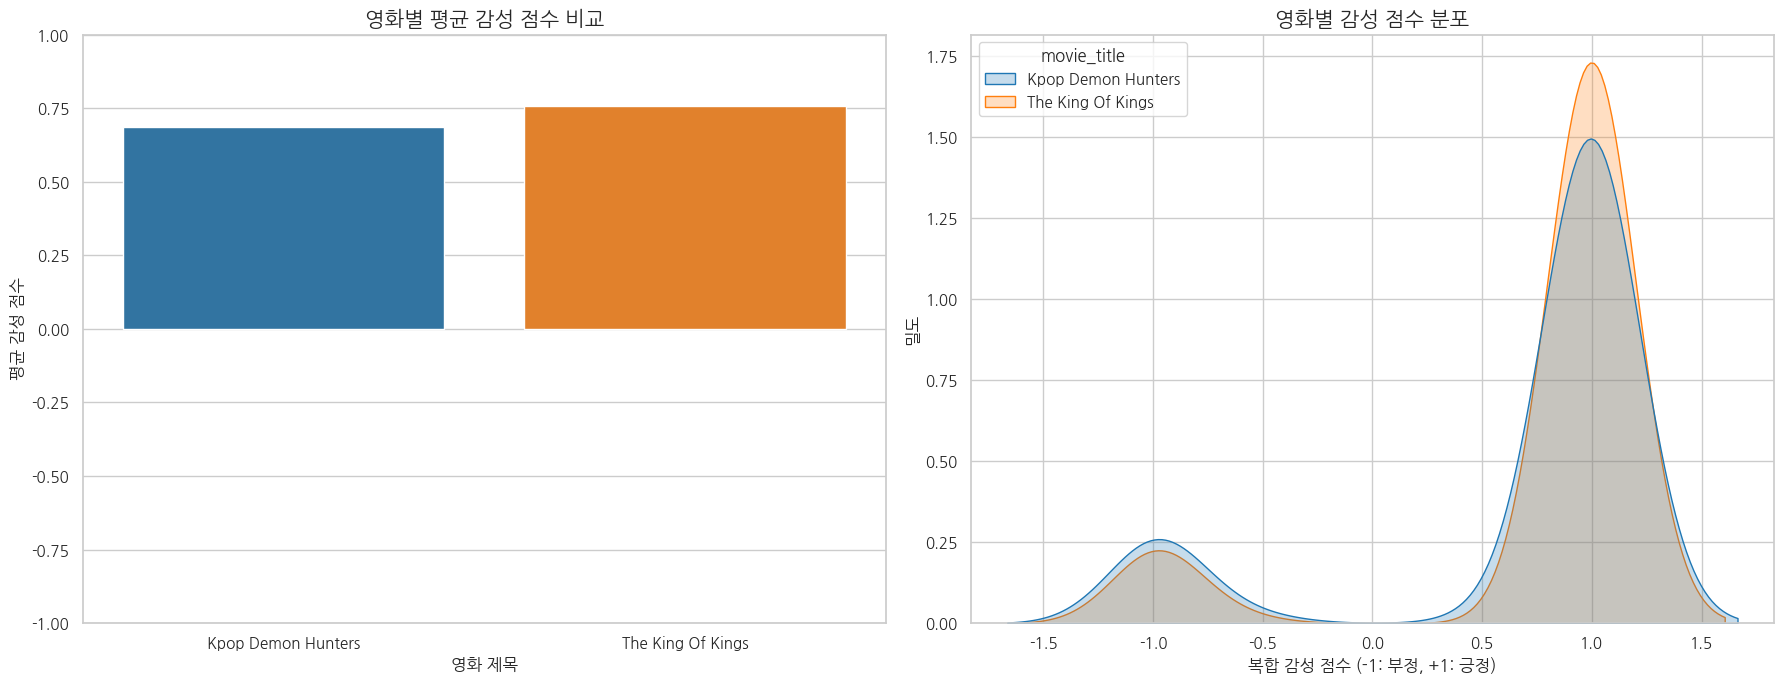

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set()을 사용하여 Matplotlib의 설정을 Seaborn에 적용합니다.
sns.set(style='whitegrid', rc={'font.family': plt.rcParams['font.family']})

movie_reviews = df_all_reviews.copy()

# matplotlib의 기본 색상 팔레트인 'tab10' 사용
default_palette = sns.color_palette('tab10')

# 사용할 색상만 미리 지정
movie_colors = {'Kpop Demon Hunters': default_palette[0], 'The King Of Kings': default_palette[1]}

# 서브플롯 생성: 1행 2열
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 첫 번째 서브플롯: 평균 감성 점수 비교 (막대 그래프)
sns.barplot(x='movie_title', y='normalized_score', data=movie_reviews, hue='movie_title', legend=False, errorbar=None, palette=movie_colors, ax=axes[0])
axes[0].set_title('영화별 평균 감성 점수 비교', fontsize=15)
axes[0].set_xlabel('영화 제목', fontsize=12)
axes[0].set_ylabel('평균 감성 점수', fontsize=12)
axes[0].set_ylim(-1.0, 1.0) # 점수 범위에 맞게 y축 조정

# 두 번째 서브플롯: 감성 점수 분포 비교 (밀도 그래프)
sns.kdeplot(data=movie_reviews, x='normalized_score', hue='movie_title', fill=True, common_norm=False, palette=movie_colors, ax=axes[1])
axes[1].set_title('영화별 감성 점수 분포', fontsize=15)
axes[1].set_xlabel('복합 감성 점수 (-1: 부정, +1: 긍정)', fontsize=12)
axes[1].set_ylabel('밀도', fontsize=12)

# 전체 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

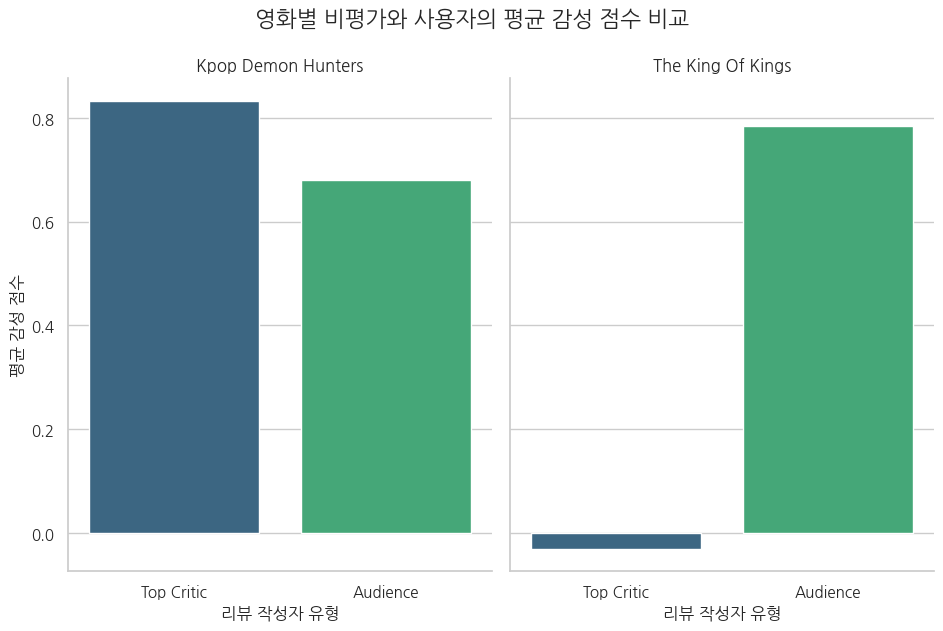

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 영화별로 비평가와 사용자의 평균 감성 점수 비교
g = sns.catplot(
    data=df_all_reviews,
    x='author_type',
    y='normalized_score',
    hue='author_type',
    col='movie_title',
    kind='bar',
    errorbar=None,
    palette='viridis',
    height=6,
    aspect=0.8
)

g.fig.suptitle('영화별 비평가와 사용자의 평균 감성 점수 비교', fontsize=16, y=1.05)
g.set_axis_labels('리뷰 작성자 유형', '평균 감성 점수')
g.set_titles(col_template='{col_name}')
plt.show()

### 영화 리뷰 비교 분석: KPop Demon Hunters vs. The King of Kings


두 영화 모두 높은 사용자 평점을 기록했지만, **비평가들의 반응에서 중요한 차이**를 보였습니다.

| 구분 | KPop Demon Hunters | The King Of Kings |
|:---|:---|:---|
| **비평가 리뷰** | **100% 긍정 (Fresh)** <br> &nbsp; | **54.5% 긍정 (Fresh)** <br> 45.5% 부정 (Rotten) |
| **사용자 리뷰** | **평균 4.51점** <br> 85.6% 긍정 | **평균 4.54점** <br> 88.1% 긍정 |

#### 주요 차이점 및 분석

* **`KPop Demon Hunters`**: 비평가와 사용자 모두에게서 **만장일치에 가까운 호평**을 받았습니다. 이는 영화가 모든 관객층에게 보편적인 재미와 완성도를 제공했음을 시사합니다.

* **`The King of Kings`**: 이 영화는 비평가들 사이에서 의견이 **긍정/부정으로 뚜렷하게 갈렸습니다**. 하지만 사용자들에게서는 `K-pop Demon Hunters`와 비슷한 수준의 압도적인 긍정 평가를 받았습니다. 이는 비평가들의 기준에는 맞지 않을 수 있지만, 대중적 흥행을 이끄는 **특정 팬층이나 대중의 취향을 정확히 저격**한 영화일 가능성이 높습니다.

### 영화별 감성 점수 비교 해석

두 차트를 통해 **Kpop Demon Hunters**와 **The King Of Kings**에 대한 사용자들의 감정적 반응이 매우 유사함을 확인할 수 있습니다.

---

#### 1. 평균 감성 점수 (막대 그래프)

두 영화의 평균 감성 점수는 유사하지만 **정확히 동일하지는 않습니다**.
* **The King Of Kings:** 약 **0.75점**
* **Kpop Demon Hunters:** 약 **0.68점**

이는 두 영화 모두 사용자들로부터 높은 수준의 긍정적인 평가를 받았으며, 그중 `The King Of Kings`가 미세하게 더 높은 평균 점수를 기록했음을 의미합니다.

#### 2. 감성 점수 분포 (밀도 그래프)

두 영화의 감성 점수 분포 곡선은 **거의 완벽하게 일치**하며, 이는 두 영화에 대한 관객들의 감정 패턴이 매우 유사함을 보여줍니다.
* **-1.0 근처의 작은 봉우리:** 일부 **부정적인 평가**가 존재함을 나타냅니다.
* **0.9~1.0 사이의 높은 봉우리:** 대다수 리뷰가 **강력한 긍정 감정**을 담고 있음을 보여줍니다.

#### 3. 비평가 vs 사용자 감성 평가 차이 (막대 그래프 기반)

`Kpop Demon Hunters`와 `The King Of Kings`는 비평가와 관객 사이의 평가 차이에서 **명확한 대조**를 보입니다.

* **Kpop Demon Hunters:**
    이 영화는 비평가와 관객 **모두에게 긍정적인 평가**를 받았습니다. 비평가 점수(약 **0.85점**)와 관객 점수(약 **0.68점**) 모두 높은 수준을 기록했습니다. 이는 영화가 전문가와 대중 양쪽 모두로부터 호응을 얻었다는 것을 의미합니다.

* **The King Of Kings:**
    이 영화는 **비평가와 관객의 평가가 극명하게 엇갈립니다**. 비평가는 영화에 대해 미세하게 부정적인 평가(약 **-0.01점**)를 내린 반면, 관객들은 매우 강력한 긍정적 평가(약 **0.78점**)를 보여주었습니다. 이는 영화의 흥행이 전문가의 평가와는 무관하게 **대중적 공감**에 의해 좌우되었음을 시사합니다.

이러한 분석을 통해 두 영화 모두 관객에게 긍정적인 평가를 받았지만, `The King Of Kings`는 비평가와 관객 사이의 **극명한 평가 차이**를, `Kpop Demon Hunters`는 **모두의 긍정적인 평가**를 받았다는 중요한 차이점이 드러납니다.

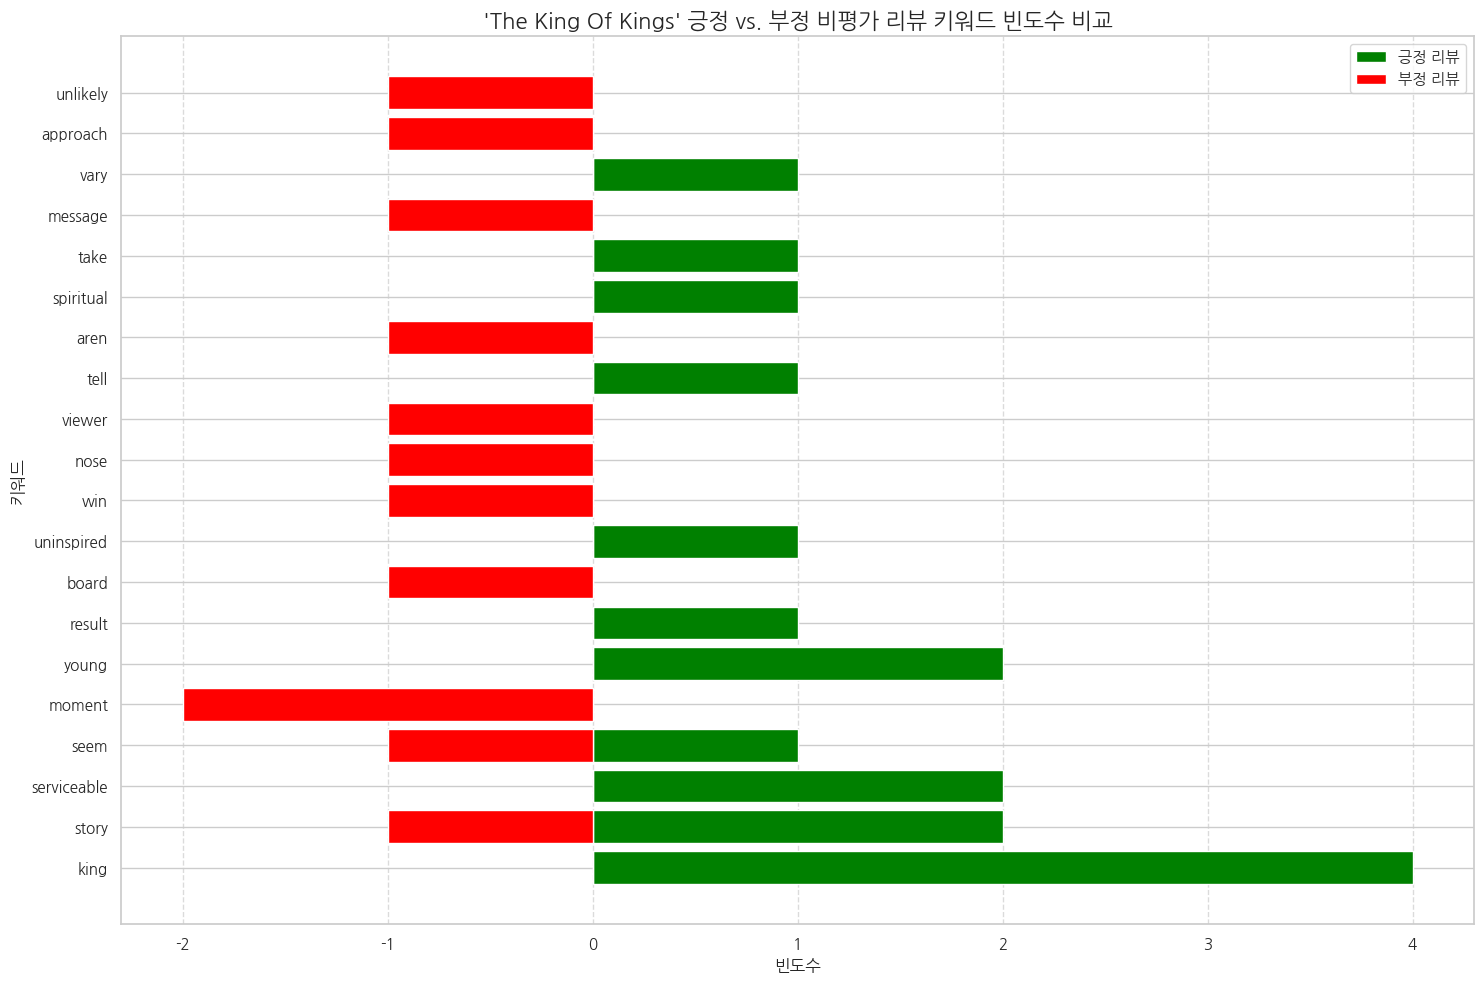

In [12]:
# 단어 빈도수 계산 함수
def get_word_counts(text_list):
    all_text = " ".join(text_list).lower()
    # 영문자와 공백만 남기고 모두 제거
    all_text = re.sub(r'[^a-z\s]', ' ', all_text)
    words = all_text.split()
    
    
    # 품사 태깅 및 필터링
    pos_tagged_words = nltk.pos_tag(words)
    filtered_pos_words = [(word, tag) for word, tag in pos_tagged_words if tag.startswith('N') or tag.startswith('J') or tag.startswith('V')]
    
    # 표제어 추출 (Lemmatization)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in filtered_pos_words]
    
    # 불용어 제거 및 2자 이상 단어 필터링
    final_words = [word for word in lemmatized_words if word not in STOPWORDS and len(word) > 2]
    
    return Counter(final_words)

# 막대 그래프 함수
def generate_diverging_bar_chart(fresh_text_list, rotten_text_list, title, top_n=10):
    fresh_counts = get_word_counts(fresh_text_list)
    rotten_counts = get_word_counts(rotten_text_list)
    
    # 긍정/부정 리뷰에서 모두 사용된 상위 단어들을 합집합으로 추출
    combined_words = list(set([word for word, count in fresh_counts.most_common(top_n)] + [word for word, count in rotten_counts.most_common(top_n)]))
    
    # 두 그룹의 키워드를 하나의 DataFrame으로 통합
    df = pd.DataFrame({
        'word': combined_words,
        'fresh_count': [fresh_counts.get(word, 0) for word in combined_words],
        'rotten_count': [rotten_counts.get(word, 0) for word in combined_words]
    })
    
    # 긍정 리뷰가 많은 순으로 정렬
    df['total'] = df['fresh_count'] + df['rotten_count']
    df = df.sort_values('total', ascending=False)
    
    # 부정 리뷰 빈도에 -1을 곱해 좌측으로 막대가 그려지게 함
    df['rotten_count'] = df['rotten_count'] * -1
    
    # 그래프 그리기
    plt.figure(figsize=(15, 10))
    plt.barh(df['word'], df['fresh_count'], color='green', label='긍정 리뷰')
    plt.barh(df['word'], df['rotten_count'], color='red', label='부정 리뷰')
    
    plt.title(f"'{title}' 긍정 vs. 부정 비평가 리뷰 키워드 빈도수 비교", fontsize=16)
    plt.xlabel('빈도수')
    plt.ylabel('키워드')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# 킹 오브 킹스 비평가 리뷰 데이터 필터링
df_kok_critics = df_all_reviews[
    (df_all_reviews['movie_title'] == 'The King Of Kings') & 
    (df_all_reviews['author_type'] == 'Top Critic')
].dropna(subset=['review_text', 'score'])

# 긍정(Fresh) 리뷰와 부정(Rotten) 리뷰로 분리
df_fresh_critics = df_kok_critics[df_kok_critics['score'] == 'Fresh']
df_rotten_critics = df_kok_critics[df_kok_critics['score'] == 'Rotten']

# 좌우 막대 그래프 생성
generate_diverging_bar_chart(
    df_fresh_critics['review_text'].tolist(),
    df_rotten_critics['review_text'].tolist(),
    "The King Of Kings"
)

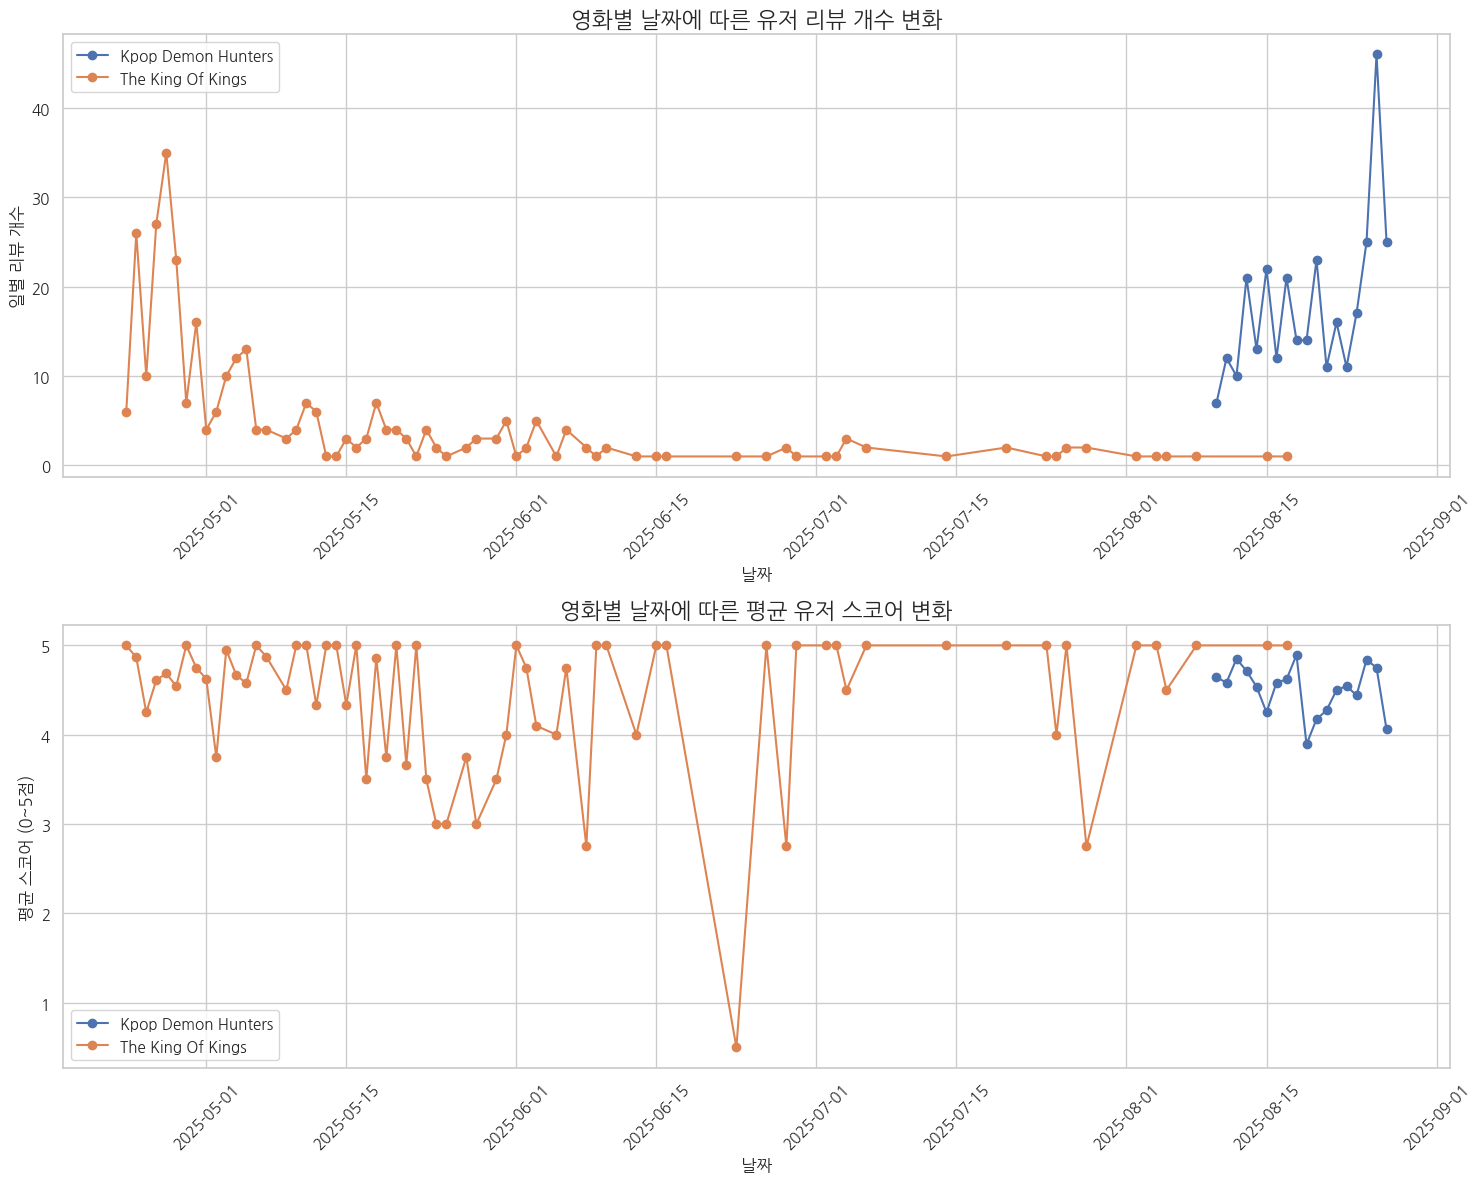

In [13]:
# 유저 리뷰만 필터링합니다.
df_user_reviews = df_all_reviews[df_all_reviews['author_type'] == 'Audience'].copy()

# '4.5/5'와 같은 형식의 문자열 점수를 숫자로 변환합니다.
df_user_reviews['numerical_score'] = df_user_reviews['score'].str.split('/').str[0].astype(float)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# 첫 번째 서브플롯: 일별 리뷰 개수
df_daily_counts = df_user_reviews.groupby(['movie_title', 'review_date']).size().reset_index(name='review_count')

for title, group in df_daily_counts.groupby('movie_title'):
    ax1.plot(group['review_date'], group['review_count'], marker='o', linestyle='-', label=title)

ax1.set_title('영화별 날짜에 따른 유저 리뷰 개수 변화', fontsize=16)
ax1.set_xlabel('날짜')
ax1.set_ylabel('일별 리뷰 개수')
ax1.legend()
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# 두 번째 서브플롯: 일별 평균 스코어
df_daily_scores = df_user_reviews.groupby(['movie_title', 'review_date'])['numerical_score'].mean().reset_index()

for title, group in df_daily_scores.groupby('movie_title'):
    ax2.plot(group['review_date'], group['numerical_score'], marker='o', linestyle='-', label=title)

ax2.set_title('영화별 날짜에 따른 평균 유저 스코어 변화', fontsize=16)
ax2.set_xlabel('날짜')
ax2.set_ylabel('평균 스코어 (0~5점)')
ax2.legend()
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

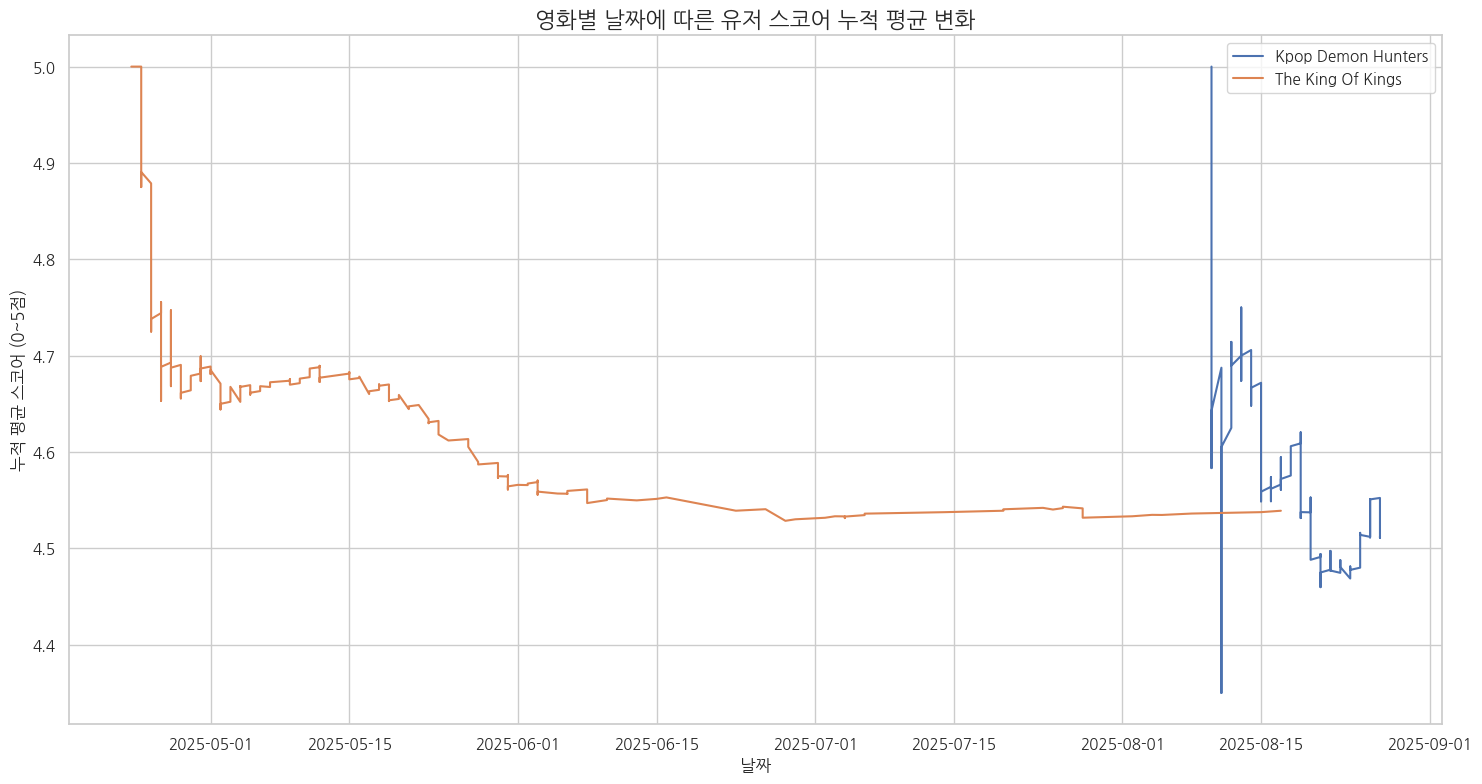

In [14]:
# 영화 제목과 날짜를 기준으로 정렬합니다.
df_user_reviews = df_user_reviews.sort_values(by=['movie_title', 'review_date'])

# 그룹별로 누적 평균을 계산합니다.
df_cumulative_scores = df_user_reviews.groupby('movie_title')['numerical_score'].expanding().mean().reset_index()

# 컬럼 이름을 정리합니다.
df_cumulative_scores.rename(columns={'numerical_score': 'cumulative_score', 'level_1': 'original_index'}, inplace=True)

# 원본 데이터의 날짜 정보를 가져옵니다.
df_cumulative_scores = df_cumulative_scores.merge(df_user_reviews[['review_date', 'movie_title']].reset_index(), left_on=['original_index', 'movie_title'], right_on=['index', 'movie_title'], how='left').drop(columns=['index'])

# 그래프 그리기
plt.figure(figsize=(15, 8))

for title, group in df_cumulative_scores.groupby('movie_title'):
    plt.plot(group['review_date'], group['cumulative_score'], linestyle='-', label=title)

plt.title('영화별 날짜에 따른 유저 스코어 누적 평균 변화', fontsize=16)
plt.xlabel('날짜')
plt.ylabel('누적 평균 스코어 (0~5점)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 두 영화의 시간 흐름에 따른 유저 반응 변화 분석

---

#### 리뷰 수 및 유저 스코어 변화 추이

* **리뷰 개수 변화**:
    * **The King Of Kings**는 개봉 초기에 **리뷰가 폭발적으로 증가**한 후 급격히 줄어드는 양상을 보입니다. 이는 개봉 효과로 인한 **초기 관심과 높은 화제성**을 나타냅니다.
    * **Kpop Demon Hunters**는 공개 시점(8월 중순) 이후 **지속적이고 꾸준한 리뷰 증가세**를 보입니다. 이는 OTT 플랫폼의 특성상 **입소문과 함께 서서히 팬덤이 확장**되었음을 의미합니다.

* **일일 평균 유저 스코어**:
    * **The King Of Kings**는 초기에 높은 점수를 기록하다가 일시적으로 **하락**하는 모습을 보입니다. 이는 초기 과도한 기대감에 대한 반작용이나, 낮은 점수의 리뷰가 집중적으로 등록되었을 가능성을 시사합니다. **특히, 북미 배급사인 엔젤 스튜디오가 부활절 시즌에 맞춰 개봉한 것이 초기 화제성 급증에 큰 영향을 미친 것으로 보입니다.** 하지만 이후 점수가 다시 회복되며 안정적인 모습을 찾습니다.
    * **Kpop Demon Hunters**는 공개 직후 **4.5점 이상**의 매우 높은 점수를 꾸준히 유지하며, 단기적인 점수 변동이 적고 안정적인 긍정 반응을 얻었습니다.

* **누적 평균 유저 스코어**:
    * **The King Of Kings**는 초반의 급격한 변동에도 불구하고 시간이 지나면서 **누적 평균 점수가 4.5점대**에서 안정화됩니다.
    * **Kpop Demon Hunters**는 공개 후 **4.7점대**의 높은 누적 평균을 기록하며, 안정적인 긍정 반응을 유지합니다.


In [15]:
from scipy.stats import f_oneway

# 두 영화의 성공 전략 중 하나인 관객 평가 차이를 통계적으로 검증하기 위해 일원분산분석(ANOVA)을 사용합니다.
# ANOVA는 두 영화의 관객 평점 평균이 통계적으로 유의미한 차이가 있는지 검증하는 데 목적이 있습니다.

# 영화별 유저 평점 분리
scores_kdh = df_all_reviews[(df_all_reviews['movie_title']=="Kpop Demon Hunters") & 
                            (df_all_reviews['author_type']=="Audience")]['audience_score_numeric']

scores_kok = df_all_reviews[(df_all_reviews['movie_title']=="The King Of Kings") & 
                            (df_all_reviews['author_type']=="Audience")]['audience_score_numeric']

# 일원분산분석(ANOVA)
f_stat, p_val = f_oneway(scores_kdh, scores_kok)
print("F-통계량:", f_stat)
print("p-값:", p_val)


F-통계량: 0.09910975272820315
p-값: 0.7530035230592859


### ANOVA 분석 결과 요약

* **F-통계량**: `0.0991`
* **p-값**: `0.7530`

이 분석은 두 영화가 채택한 **복합적인 성공 전략**이 관객 평점에 통계적으로 유의미한 차이를 가져왔는지 **검증**하기 위해 사용되었습니다.

'케이팝 데몬 헌터스'와 '킹 오브 킹스'는 각각 다음과 같은 독특한 성공 전략을 구사했습니다.

* **'케이팝 데몬 헌터스'의 전략**: 넷플릭스 유통 플랫폼 활용, K-POP 및 무속신앙 등 한국적 요소 융합
* **'킹 오브 킹스'의 전략**: 북미 극장 개봉, 순수 한국 자본 및 기술력, 기독교 소재 활용

---

#### 분석 결론

* `p-값(0.7530)`은 통계적 유의성 기준인 `0.05`보다 훨씬 높습니다.
* 이는 귀무가설을 기각할 수 없음을 의미하며, 두 영화의 **사용자 평점 평균 간에 통계적으로 유의미한 차이가 없다**는 것을 통계적으로 증명합니다.

즉, 각 영화가 구사한 **서로 다른 성공 전략에도 불구하고**, 최종적으로 사용자들로부터 받은 만족도(평점)는 통계적으로 동일한 수준이었다는 점을 검증했습니다.

### **2025년 3D 애니메이션 시장 성공 사례 비교 분석: 최종 결론**

본 분석은 Kpop Demon Hunters와 the King Of Kings라는 상반된 두 애니메이션의 성공 사례를 데이터 기반으로 비교하여 신규 애니메이션의 글로벌 시장 진출 방향성을 제시하는 데 목적을 두었습니다.

---

#### 1. 두 영화의 상반된 성공 전략

* **Kpop Demon Hunters**: 넷플릭스라는 **글로벌 OTT 플랫폼**을 통해 **K-POP, 무속신앙** 등 한국의 현대 대중문화를 융합한, **새로운 시장을 개척하는 성공 모델**입니다.
* **The King Of Kings**: 순수 한국 기술력으로 서구 문화의 핵심인 **기독교 소재**를 다루고 **북미 극장 시장**에서 직접 흥행을 이뤄낸, **전통적인 성공 모델**을 보여줍니다. **특히, 북미 배급사인 엔젤 스튜디오(Angel Studios)는 주로 기독교 작품을 전문적으로 다루는 곳으로, 북미 기독교인 관객층을 겨냥한 효과적인 마케팅을 펼친 것으로 분석됩니다.**

---

#### 2. 데이터 기반의 성공 요인 분석

* **압도적으로 높은 사용자 만족도**: 두 영화 모두 사용자들로부터 매우 강력하고 긍정적인 감성 점수를 얻었습니다. **The King Of Kings는 사용자들의 지지가 비평가들의 낮은 평가를 상쇄**하며 흥행을 이끌었고, **Kpop Demon Hunters는 비평가와 사용자가 모두 긍정적인 평가로 합을 맞추며** 성공을 견인했습니다. 감성 점수 분포 분석 결과, 대부분의 리뷰가 최고점에 몰려 있어 소수의 강력한 팬덤이 형성되었음을 보여줍니다.

* **성공을 이끈 핵심 키워드**: 두 영화의 성공은 근본적으로 다른 이유에서 비롯되었습니다.
    * **Kpop Demon Hunters**의 리뷰에서는 `song`, `music`, `animation`, `kpop`과 같은 **장르적/시각적 요소**가 가장 많이 언급되었습니다. 이 영화는 혁신적인 컨셉과 음악으로 특정 팬덤을 성공적으로 공략했습니다.
    * **The King Of Kings**의 리뷰에서는 `jesus`, `king`, `story`, `family`와 같은 **이야기와 보편적 가치** 관련 단어들이 지배적이었습니다. 이는 영화가 종교적, 가족적 가치를 중요시하는 광범위한 관객층에 깊은 울림을 주었음을 증명합니다.

---

#### 최종 결론

`Kpop Demon Hunters`와 `The King Of King`는 서로 **정반대의 전략**으로 성공을 거두었습니다.

* **`Kpop Demon Hunters`의 성공은 '팬덤'을 통해 '새로운 시장'을 창출하는 전략의 유효성**을 보여줍니다.
* **`The King Of Kings`의 성공은 '보편적인 메시지'를 통해 '전통적인 시장'을 공략하는 전략의 유효성**을 보여줍니다.

이 두 사례는 신규 애니메이션 영화가 글로벌 시장에서 성공하기 위해서는 오직 한 가지 길만 있는 것이 아니라, 명확한 페르소나(Persona)를 설정하고 그들에게 맞는 방식으로 접근한다면 어떤 전략이든 성공할 수 있다는 중요한 시사점을 제공합니다.